# SunPy Testing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

First, import the SunPy library and test to see if we have installed the correct version.

In [2]:
import sunpy

In [3]:
sunpy.system_info()

 SunPy Installation Information


###########
 General
###########
Time : Monday, 08. February 2016 09:48PM UT
System : Linux
Processor : x86_64
Arch : 64bit
SunPy : 0.7.dev6442
SunPy_git : 9d27abf22d430fec2050001ee007be7742f1d4bd
OS: debian jessie/sid  (Linux 3.13.0-68-generic x86_64)


###########
 Required Libraries 
###########
Python: 3.5.1
NumPy: 1.10.2
SciPy: 0.16.1
matplotlib: 1.5.1
Astropy: 1.1.1
Pandas: 0.17.1


###########
 Recommended Libraries 
###########
beautifulsoup: 4.4.1
PyQt: 4.11.4
SUDS: 0.6
Sqlalchemy: 1.0.11
Requests: 2.9.1


Now, load in some sample data to work with.

In [5]:
sunpy.data.download_sample_data()
import sunpy.data.sample

Unpacking: aia.lev1.193A_2013-09-21T16_00_06.84Z.image_lev1.fits


In [7]:
import sunpy.map

/opt/anaconda3/lib/python3.5/site-packages/sunpy-0.7.dev6442-py3.5.egg/sunpy/visualization/wcsaxes_compat.py:17: UserWarning: SunPy plotting is improved by installing the WCSAxes module: http://wcsaxes.readthedocs.org/en/latest/index.html
  warnings.warn("SunPy plotting is improved by installing the WCSAxes module: http://wcsaxes.readthedocs.org/en/latest/index.html")


In [8]:
aiamap = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aiamap

SunPy AIAMap
---------
Observatory:	 SDO
Instrument:	 AIA 3
Detector:	 AIA
Measurement:	 171.0 Angstrom
Wavelength:	 171.0 Angstrom
Obs Date:	 2011-03-19 10:54:00
dt:		 1.999601 s
Dimension:	 [ 1024.  1024.] pix
scale:		 [ 2.4  2.4] arcsec / pix

array([[ 0.3125, -0.0625, -0.125 , ...,  0.625 , -0.625 ,  0.    ],
       [ 1.    ,  0.1875, -0.8125, ...,  0.625 , -0.625 ,  0.    ],
       [-1.1875,  0.375 , -0.5   , ..., -0.125 , -0.625 , -1.1875],
       ..., 
       [-0.625 ,  0.0625, -0.3125, ...,  0.125 ,  0.125 ,  0.125 ],
       [ 0.5625,  0.0625,  0.5625, ..., -0.0625, -0.0625,  0.    ],
       [ 0.5   , -0.125 ,  0.4375, ...,  0.6875,  0.6875,  0.6875]])

## Plotting the Map

In [9]:
import astropy.units as u

In [10]:
aiasub = aiamap.submap([-250,50]*u.arcsec,[-550,-250]*u.arcsec)

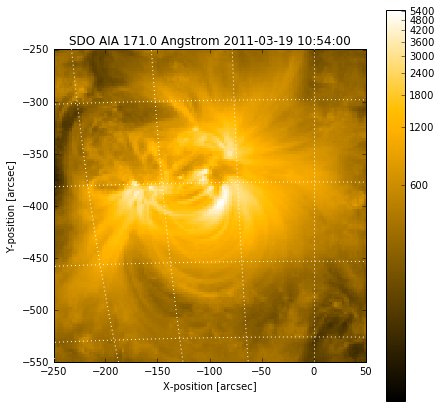

In [11]:
fig,ax = plt.subplots(1,figsize=(7,7))
im = aiasub.plot(axes=ax,vmin=100,vmax=aiasub.data.max())
ax = aiasub.draw_grid(grid_spacing=5*u.deg)
cbar = plt.colorbar()

## Composite Maps

In [12]:
compmap = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE,sunpy.data.sample.RHESSI_IMAGE,composite=True)

In [13]:
levels = np.arange(0,50,5)
compmap.set_levels(1,levels,percent=True)
compmap.set_alpha(1,0.5)
compmap.set_colors(1,'Reds_r')

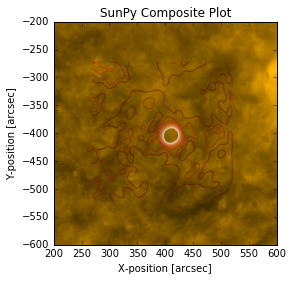

In [14]:
ax = plt.subplot()
compmap.plot()
ax.axis([200,600,-600,-200])
plt.show()

## VSO to Grab Real AR Images

In [15]:
from sunpy.net import vso

ImportError: No module named 'urllib2'

In [15]:
client = vso.VSOClient()

Now, let's search the VSO for an AR observed by SDO/AIA just a few hours ago!

In [21]:
recs = client.query(vso.attrs.Time('2015/08/27 11:42:47','2015/08/27 11:57:47'),vso.attrs.Instrument('AIA'),
                    vso.attrs.Wave(171*u.angstrom,193*u.angstrom))

In [22]:
recs.num_records()

10

In [23]:
recs.show()

   Start Time [1]       End Time [1]    Source Instrument   Type  
------------------- ------------------- ------ ---------- --------
2015-08-27 11:45:00 2015-08-27 11:45:00    SDO        AIA FULLDISK
2015-08-27 11:45:00 2015-08-27 11:45:00    SDO        AIA FULLDISK
2015-08-27 11:48:00 2015-08-27 11:48:00    SDO        AIA FULLDISK
2015-08-27 11:48:00 2015-08-27 11:48:00    SDO        AIA FULLDISK
2015-08-27 11:51:00 2015-08-27 11:51:00    SDO        AIA FULLDISK
2015-08-27 11:51:00 2015-08-27 11:51:00    SDO        AIA FULLDISK
2015-08-27 11:54:00 2015-08-27 11:54:00    SDO        AIA FULLDISK
2015-08-27 11:54:00 2015-08-27 11:54:00    SDO        AIA FULLDISK
2015-08-27 11:57:00 2015-08-27 11:57:00    SDO        AIA FULLDISK
2015-08-27 11:57:00 2015-08-27 11:57:00    SDO        AIA FULLDISK


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: Warning: Call to deprecated function show. 
 Use `print qr` to view the contents of the response
  if __name__ == '__main__':


Now, download the data from the records we have requested.

In [28]:
files = client.get(recs).wait()

In [30]:
aia_0 = sunpy.map.Map(files[0])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


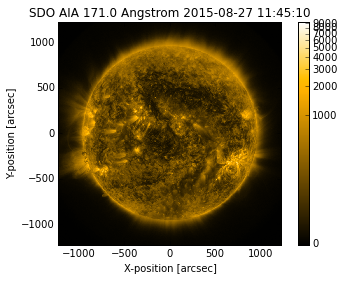

In [31]:
aia_0.peek()

In [42]:
sub_aia_0 = aia_0.submap([500,1000]*u.arcsec,[-600,-100]*u.arcsec)

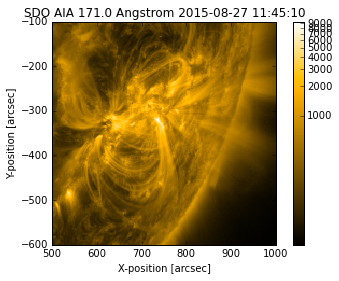

In [43]:
sub_aia_0.peek()

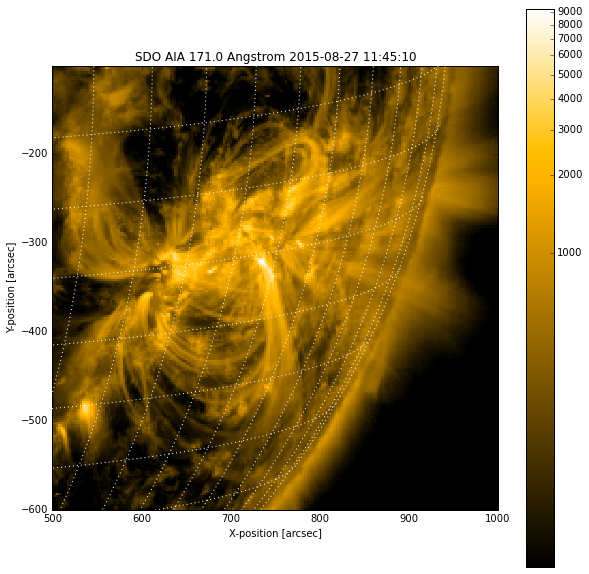

In [55]:
fig,ax = plt.subplots(1,figsize=(10,10))
im = sub_aia_0.plot(axes=ax,vmin=100,vmax=sub_aia_0.data.max())
ax = sub_aia_0.draw_grid(grid_spacing=5*u.deg)
cb = plt.colorbar()
plt.savefig('/Users/willbarnes/Desktop/sunpy_test.png',format='png',dpi=500)

In [51]:
aia_last = sunpy.map.Map(files[-2])

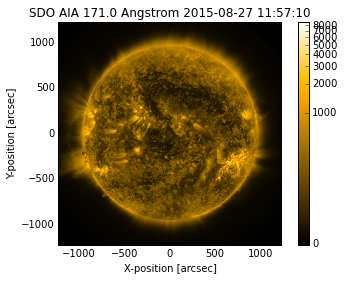

In [52]:
aia_last.peek()